In [26]:
import librosa 
import librosa.display
import IPython
import os
from scipy.io import wavfile

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

In [74]:
filepath = os.path.join("..", "data", "training", "left", "l11.wav")

y, samples = librosa.load(filepath)


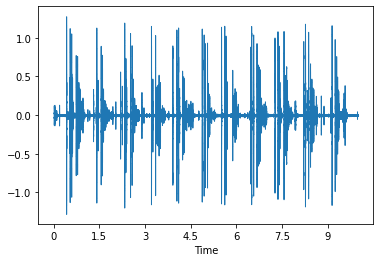

In [75]:
librosa.display.waveshow(y, sr=samples);


In [81]:
len(y)

220500

In [157]:
def prepare_song(song_path):
  list_matrices = []
  y,sr = librosa.load(song_path)
  melspect = librosa.feature.melspectrogram(y=y, sr=sr)

  return melspect

In [158]:
prepare_song(filepath)

array([[1.3571411e-02, 2.4428928e-02, 2.6602393e-02, ..., 3.0027267e-02,
        3.2883082e-02, 3.0232737e-02],
       [5.6096271e-02, 1.4142533e-01, 1.5214671e-01, ..., 1.8413515e-01,
        1.9685468e-01, 1.5791264e-01],
       [2.0925406e-02, 1.9295420e-02, 1.3981325e-02, ..., 1.6271628e-02,
        1.9546865e-02, 2.6176900e-02],
       ...,
       [3.1631338e-04, 4.7120388e-04, 2.9171619e-04, ..., 2.8034934e-05,
        4.9465238e-05, 5.0608873e-05],
       [7.3905423e-05, 1.0498046e-04, 7.1432129e-05, ..., 1.3949705e-05,
        1.9955673e-05, 1.7024367e-05],
       [2.2380050e-06, 5.0635981e-06, 6.8184322e-06, ..., 7.9372126e-07,
        1.7977845e-06, 1.7986896e-06]], dtype=float32)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

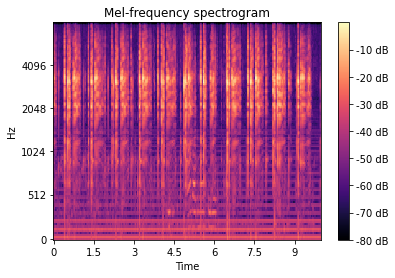

In [164]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(prepare_song(os.path.join("..", "data", "training", "left", "l11.wav")), ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

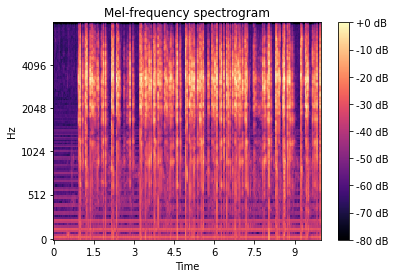

In [166]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(prepare_song(os.path.join("..", "data", "training", "right", "l1.wav")), ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [159]:
# all tracks will be the X features and genre will be the target y

all_tracks = []
turn = []

# add all the songs that are in the dramatic folder
for root, dirs, files in os.walk(os.path.join("..", "data", "training", "left")):
    for name in files:
        song_pieces = prepare_song(os.path.join("..", "data", "training", "left", name))
        all_tracks.append(song_pieces)
        turn.append(0.)

# add all the songs that are in the silly energy folder
for root, dirs, files in os.walk(os.path.join("..", "data", "training", "right")):
    for name in files:
        song_pieces = prepare_song(os.path.join("..", "data", "training", "right", name))
        all_tracks.append(song_pieces)
        turn.append(1.)

In [160]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(all_tracks), 
                                                    np.array(turn),
                                                    test_size=0.33,
                                                    random_state=42)

# X_val, X_test, y_val, y_test = train_test_split(X_test, 
#                                                 y_test,
#                                                 test_size=0.5,
#                                                 random_state=42)

In [161]:
X_train.shape

(53, 128, 431)

In [151]:
len(X_train[1][1])

431

In [152]:
len(X_train[1])

20

In [1]:
y_train

NameError: name 'y_train' is not defined

In [155]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 431, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_50. Consider increasing the input size. Received input shape [None, 1, 104, 64] which would produce output shape with a zero or negative value in a dimension.

In [148]:

from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20


ValueError: in user code:

    File "C:\Users\p-bla\miniconda3\envs\pythonml\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\p-bla\miniconda3\envs\pythonml\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\p-bla\miniconda3\envs\pythonml\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\p-bla\miniconda3\envs\pythonml\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\p-bla\miniconda3\envs\pythonml\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\p-bla\miniconda3\envs\pythonml\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 128, 431, 1), found shape=(None, 20, 431)


In [ ]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)